In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw = pd.read_csv("C:/data/kaggle_survey.csv")
raw.shape
raw

C:\Users\revol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [12]:
raw.head()
raw.tail()
raw.info()
question = raw.iloc[0]
answer = raw.drop([0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20037 entries, 0 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object')
[3469 3786 4011 2811 1991 1397  988  698  411  398   76]


<BarContainer object of 11 artists>

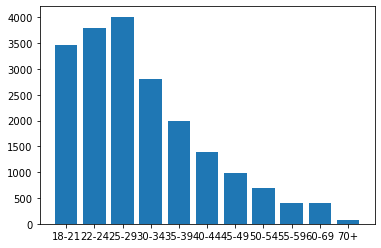

In [51]:
q1_count = answer["Q1"].value_counts().sort_index()
print(q1_count.index)
print(q1_count.values)
plt.bar(q1_count.index, q1_count)

In [3]:
question_q7 = question.filter(regex = "Q7")
print(question_q7[1])
question_q7 = question.filter(regex = "Q7")[0].split('-')[0]
answer_Q7 = answer.filter(regex = "Q7")
print(answer_Q7)
answer_Q7.notnull().sum()

What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
      Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036

Q7_Part_1     15530
Q7_Part_2      4277
Q7_Part_3      7535
Q7_Part_4      3315
Q7_Part_5      3827
Q7_Part_6      3367
Q7_Part_7      2995
Q7_Part_8       262
Q7_Part_9       198
Q7_Part_10     1776
Q7_Part_11     2217
Q7_Part_12      206
Q7_OTHER       1945
dtype: int64

In [4]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc.loc[["top", "count"]]
answer_Q7_desc.loc[["top", "count"]].T.set_index("top")

,count
top,
Python,15530
R,4277
SQL,7535
C,3315
C++,3827
Java,3367
Javascript,2995
Julia,262
Swift,198


In [5]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


In [6]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending = False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

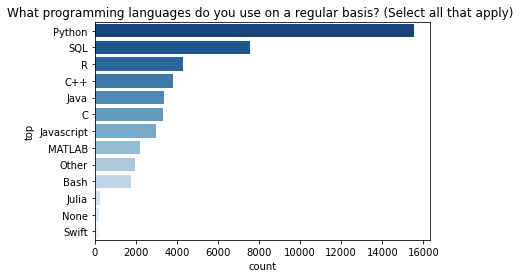

In [7]:
q7_title = question.filter(regex="Q7")[0].split('-')[0]
sns.barplot(data = answer_Q7_count, y = answer_Q7_count.index, x = "count", palette = "Blues_r").set_title(q7_title)

multiple question 반복 함수

In [9]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex = qno)[0].split('-')[0]
        return q_no

In [10]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex = qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[['top', 'count']].T.set_index("top")
    answer_count = answer_count.sort_values(by = 'count', ascending = False)
    return answer_count
get_multiple_choice_answer_by_qno("Q7")

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


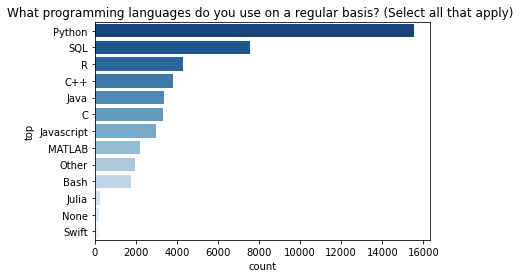

In [11]:
def show_multiple_choice_bar_plot_by_qno(qno):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
    sns.barplot(data = multiple_choice_answer, y = multiple_choice_answer.index, x = "count",
               palette = "Blues_r").set_title(get_question_title_by_qno(qno))
show_multiple_choice_bar_plot_by_qno("Q7")